# MIDI tutorial

This Python script uses music21 to process a MIDI file (voice + piano), inspect its content, and export visualizations and different file formats for specific parts.

In [1]:
import music21 as m21
import matplotlib.pyplot as plt
import mido
import os

path = os.path.join(os.path.expanduser('~'), 'Desktop', 'VIC', 'ChordIA-project-preparation')

if os.path.isdir(path):
    os.chdir(path)
else:
    raise FileNotFoundError(f"La carpeta no existe: {path}")

filename = 'BeetAnGeSample_in'

# Open MIDI file
try:
    midi_file = mido.MidiFile(os.path.join(path, 'input', filename + '.mid'))

    # Show basic file info
    print(f'N. tracks: {len(midi_file.tracks)}')
    print(f'Ticks per beat: {midi_file.ticks_per_beat}')
    print(f'Duration in seconds: {midi_file.length}')

    # Iterate between tracks and messages
    for i, track in enumerate(midi_file.tracks):
        print(f'--- Track {i} ---')
        for msg in track:
            print(msg)

except FileNotFoundError:
    print("File not found.")
except Exception as e:
    print(f"Error while reading file: {e}")


N. tracks: 4
Ticks per beat: 1024
Duration in seconds: 23.0
--- Track 0 ---
MetaMessage('set_tempo', tempo=500000, time=0)
MetaMessage('key_signature', key='Eb', time=0)
MetaMessage('time_signature', numerator=3, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0)
MetaMessage('end_of_track', time=1024)
--- Track 1 ---
MetaMessage('track_name', name='Voice', time=0)
program_change channel=0 program=52 time=0
pitchwheel channel=0 pitch=0 time=0
program_change channel=0 program=52 time=0
note_on channel=0 note=70 velocity=90 time=1024
note_off channel=0 note=70 velocity=0 time=1024
note_on channel=0 note=70 velocity=90 time=0
note_off channel=0 note=70 velocity=0 time=1024
note_on channel=0 note=70 velocity=90 time=0
note_off channel=0 note=70 velocity=0 time=1536
note_on channel=0 note=72 velocity=90 time=0
note_off channel=0 note=72 velocity=0 time=512
note_on channel=0 note=74 velocity=90 time=0
note_off channel=0 note=74 velocity=0 time=512
note_on channel=0 not

In [ ]:
# Parse using m21 and show notes and chords

score_midi = m21.converter.parse(os.path.join('input',filename+'.mid'))

for n in score_midi.flat.notes:
    if n.isNote:
        print("NOTE:", n.pitch, n.offset, n.duration.quarterLength)
    elif n.isChord:
        for p in n.pitches:
            print("CHORD NOTE:", p, n.offset, n.duration.quarterLength)


CHORD NOTE: B-3 0.0 1.0
CHORD NOTE: E-4 0.0 1.0
CHORD NOTE: G4 0.0 1.0
CHORD NOTE: B-4 0.0 1.0
CHORD NOTE: E-2 0.0 1.0
CHORD NOTE: E-3 0.0 1.0
NOTE: B-4 1.0 1.0
NOTE: B-4 1.0 1.0
NOTE: G4 1.0 1.0
NOTE: B-4 2.0 1.0
NOTE: G#4 2.0 1.0
NOTE: F4 2.0 1.0
NOTE: B-4 3.0 1.5
NOTE: G4 3.0 1.0
NOTE: E-4 3.0 1.0
CHORD NOTE: G3 4.0 1.0
CHORD NOTE: E-4 4.0 1.0
CHORD NOTE: G4 4.0 1.0
CHORD NOTE: E-2 4.0 1.0
CHORD NOTE: E-3 4.0 1.0
NOTE: C5 4.5 0.5
NOTE: D5 5.0 0.5
NOTE: E-5 5.5 0.5
NOTE: E-5 6.0 1.0
NOTE: G4 7.0 0.5
CHORD NOTE: G3 7.0 1.0
CHORD NOTE: C4 7.0 1.0
CHORD NOTE: E-4 7.0 1.0
CHORD NOTE: G4 7.0 1.0
CHORD NOTE: C2 7.0 1.0
CHORD NOTE: C3 7.0 1.0
NOTE: G#4 8.0 0.5
NOTE: G4 8.5 0.5
CHORD NOTE: G3 8.5 0.5
CHORD NOTE: E-4 8.5 0.5
CHORD NOTE: G4 8.5 0.5
CHORD NOTE: B-1 8.5 0.5
CHORD NOTE: B-2 8.5 0.5
NOTE: F4 9.0 0.5
NOTE: F4 9.0 0.5
NOTE: C4 9.0 1.0
CHORD NOTE: G#1 9.0 1.0
CHORD NOTE: G#2 9.0 1.0
NOTE: G#4 9.5 0.5
NOTE: G#4 9.5 0.5
NOTE: C5 10.0 1.0
CHORD NOTE: C5 10.0 1.0
CHORD NOTE: C4 10.0 1.0


['Voice', 'Piano', 'Piano']


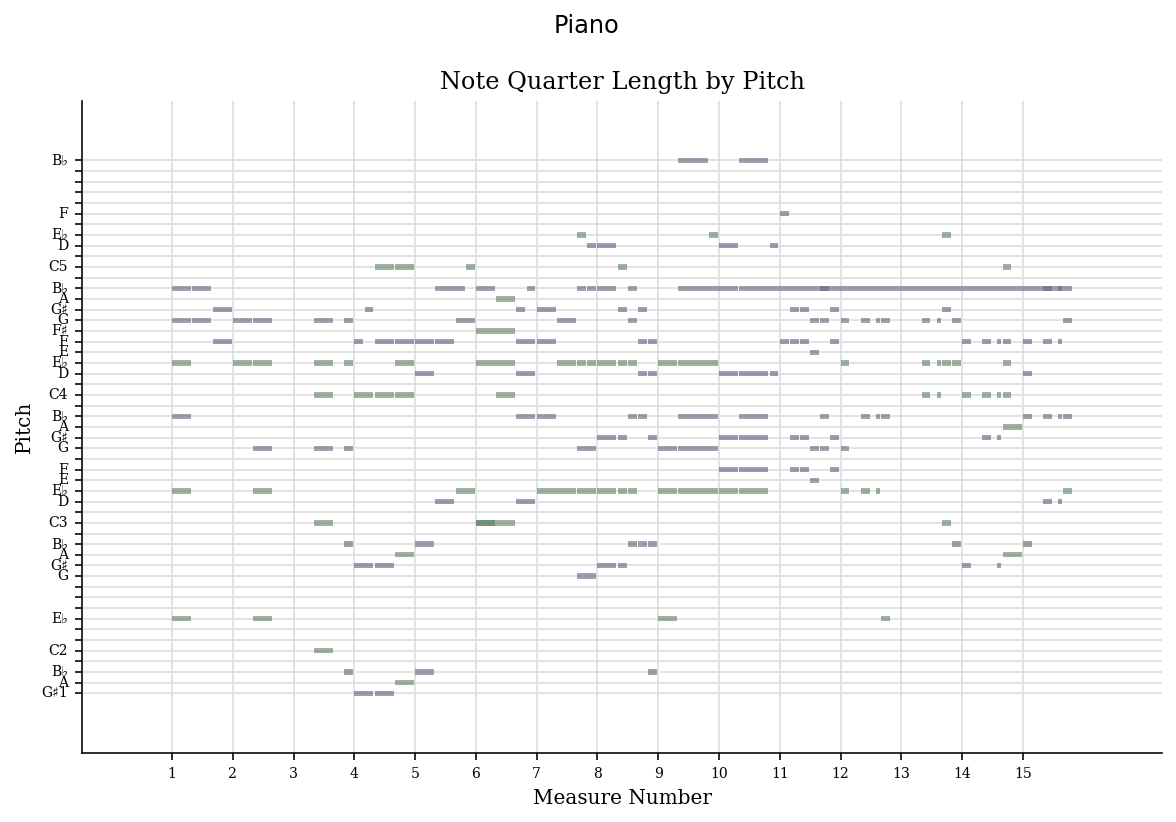

In [3]:
# Check part names
print([score_midi.parts[i].partName for i in range(len(score_midi.parts))])

# Plot & Save voice pianoroll & midi & musicxml
if score_midi.parts[0].partName == 'Voice':
    p = score_midi.parts[0].plot('pianoroll')
    fig = p.figure
    fig.suptitle('Voice')
    plt.savefig(os.path.join('output','Voice'))
    score_midi.parts[0].write('midi', fp=os.path.join('output', 'Voice.mid'))
    score_midi.parts[0].write('musicxml', fp=os.path.join('output','Voice.musicxml'))

# Plot & Save piano pianoroll & musicxml both left and right hands (different parts) merged
if score_midi.parts[1].partName == 'Piano' and score_midi.parts[2].partName == 'Piano':
    merged_piano_hands = m21.stream.Stream()
    merged_piano_hands.insert(0, score_midi.parts[1])
    merged_piano_hands.insert(0, score_midi.parts[2])
    p = merged_piano_hands.plot('pianoroll')
    fig = p.figure
    fig.suptitle('Piano')
    plt.savefig(os.path.join('output','Piano'))

    # Create new score for piano midi & musicxml output
    piano_score = m21.stream.Score()
    piano_score.insert(0, score_midi.parts[1])
    piano_score.insert(0, score_midi.parts[2])
    piano_score.write('midi', fp=os.path.join('output','Piano.mid'))
    piano_score.write('musicxml', fp=os.path.join('output','Piano.musicxml'))
